In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

base_dir = '/content/drive/MyDrive/cats_and_dogs_small-20201212T071615Z-001/cats_and_dogs_small'
#base_dir = '/your_path/cats_and_dogs_small/'

train_cats_dir = os.path.join(base_dir, 'train', 'cats')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

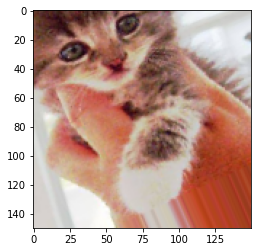

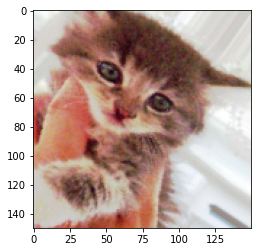

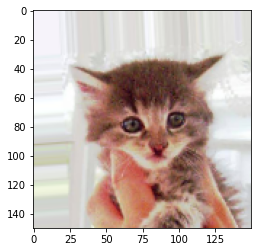

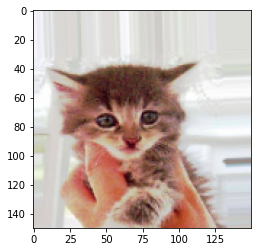

In [4]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택
img_path = fnames[3]

# 이미지를 읽고 크기를 변경
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성
# 무한 반복되기 때문에 어느 지점에서 중지해야 함
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [5]:
from tensorflow.keras import layers, models

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증/테스트 데이터는 증식되어서는 안됨
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리 지정
        train_dir,
        # 모든 이미지를 150 × 150 크기로 변경
        target_size=(150, 150),
        batch_size=20,
        # 손실함수 binary_crossentropy를 사용하기 때문에 이진 레이블 필요
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 1822s 18s/step - loss: 0.7057 - accuracy: 0.5029 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 19s 193ms/step - loss: 0.6911 - accuracy: 0.5256 - val_loss: 0.6775 - val_accuracy: 0.5880
Epoch 3/100
100/100 [==============================] - 19s 194ms/step - loss: 0.6869 - accuracy: 0.5470 - val_loss: 0.6613 - val_accuracy: 0.6050
Epoch 4/100
100/100 [==============================] - 19s 195ms/step - loss: 0.6676 - accuracy: 0.5862 - val_loss: 0.6453 - val_accuracy: 0.6310
Epoch 5/100
100/100 [==============================] - 19s 194ms/step - loss: 0.6512 - accuracy: 0.6316 - val_loss: 0.6372 - val_accuracy: 0.6220
Epoch 6/100
100/100 [==============================] - 19s 195ms/step - loss: 0.6530 - accuracy: 0.6151 - val_loss: 0.6204 - val_accuracy: 0.6610
Epoch 7/100
100/100 [==============================] - 19s 194ms/step - loss: 0.6310 - accuracy: 0.6455 - val_loss: 0.6071 -

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

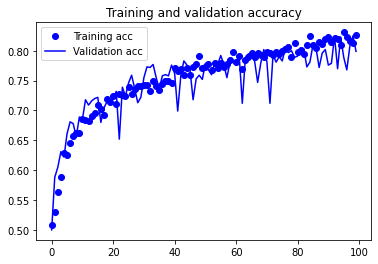

In [13]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

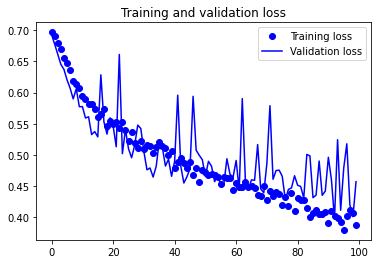

In [14]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [16]:
print(test_loss)
print(test_accuracy)

0.4830799996852875
0.7929999828338623


In [16]:
from tensorflow.keras.models import load_model

model =load_model('/content/drive/MyDrive/cats_and_dogs_small_argmentation.h5')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [28]:
from tensorflow.keras.preprocessing import image
img_path = '/content/drive/MyDrive/cats_and_dogs_small-20201212T071615Z-001/cats_and_dogs_small/train/cats/cat.739.jpg'
img = image.load_img(img_path, target_size=(150, 150))

In [29]:
import numpy as np

img_tensor =image.img_to_array(img)
img_tensor =np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


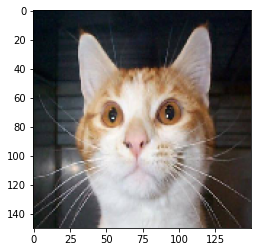

In [30]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [31]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [32]:
activations = activation_model.predict(img_tensor)

In [33]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


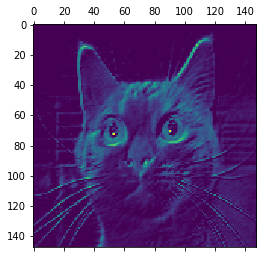

In [34]:
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')
plt.show()

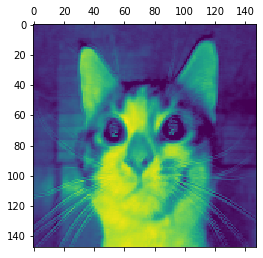

In [36]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

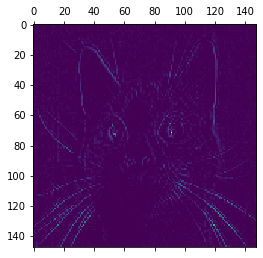

In [37]:
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')
plt.show()

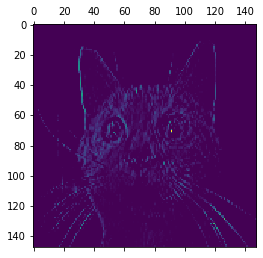

In [38]:
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.show()

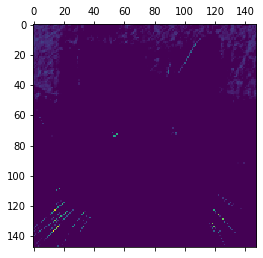

In [39]:
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.show()

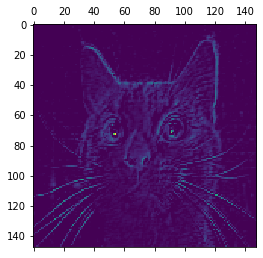

In [40]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

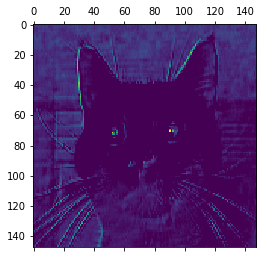

In [41]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

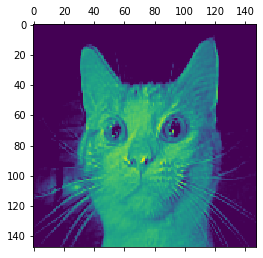

In [42]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
plt.show()

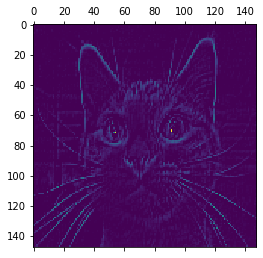

In [43]:
plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')
plt.show()

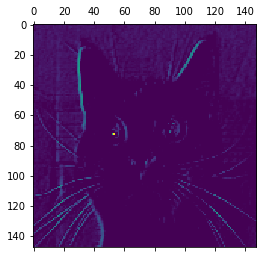

In [44]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
plt.show()

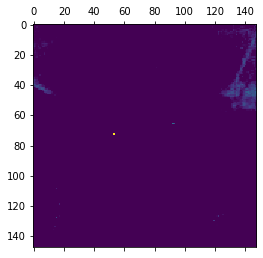

In [45]:
plt.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')
plt.show()

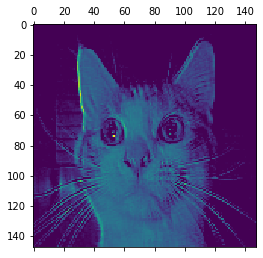

In [64]:
plt.matshow(first_layer_activation[0, :, :, 9], cmap='viridis')
plt.show()

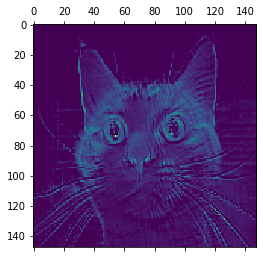

In [65]:
plt.matshow(first_layer_activation[0, :, :, 10], cmap='viridis')
plt.show()

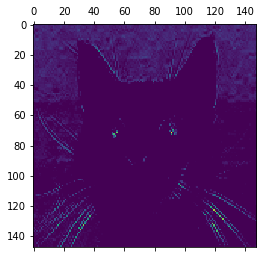

In [66]:
plt.matshow(first_layer_activation[0, :, :, 11], cmap='viridis')
plt.show()

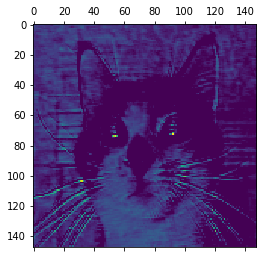

In [67]:
plt.matshow(first_layer_activation[0, :, :, 12], cmap='viridis')
plt.show()

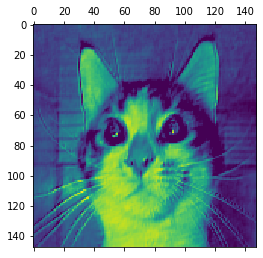

In [68]:
plt.matshow(first_layer_activation[0, :, :, 13], cmap='viridis')
plt.show()

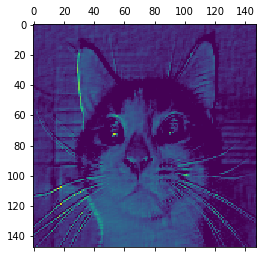

In [69]:
plt.matshow(first_layer_activation[0, :, :, 14], cmap='viridis')
plt.show()

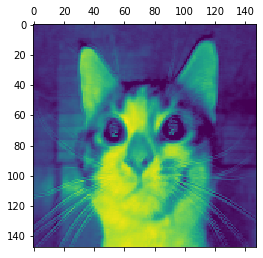

In [71]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

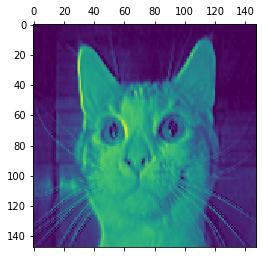

In [77]:
plt.matshow(first_layer_activation[0, :, :, 16], cmap='viridis')
plt.show()

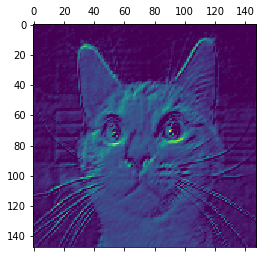

In [78]:
plt.matshow(first_layer_activation[0, :, :, 17], cmap='viridis')
plt.show()

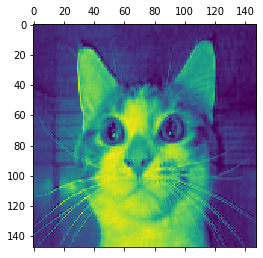

In [79]:
plt.matshow(first_layer_activation[0, :, :, 18], cmap='viridis')
plt.show()

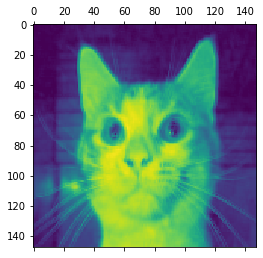

In [80]:
plt.matshow(first_layer_activation[0, :, :, 20], cmap='viridis')
plt.show()

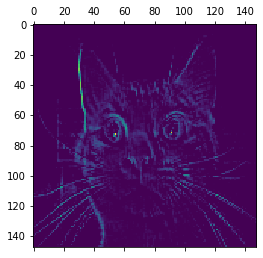

In [81]:
plt.matshow(first_layer_activation[0, :, :, 21], cmap='viridis')
plt.show()

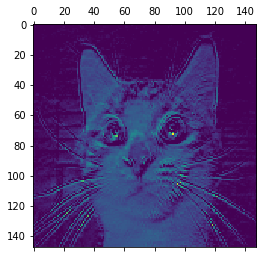

In [82]:
plt.matshow(first_layer_activation[0, :, :, 22], cmap='viridis')
plt.show()

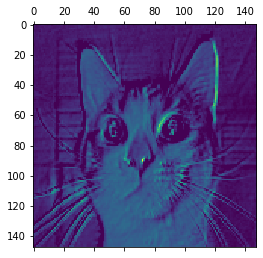

In [83]:
plt.matshow(first_layer_activation[0, :, :, 23], cmap='viridis')
plt.show()

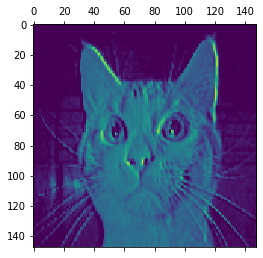

In [84]:
plt.matshow(first_layer_activation[0, :, :, 24], cmap='viridis')
plt.show()

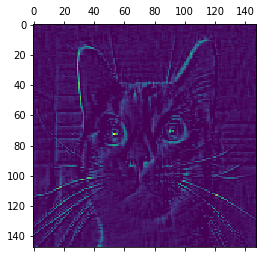

In [85]:
plt.matshow(first_layer_activation[0, :, :, 25], cmap='viridis')
plt.show()

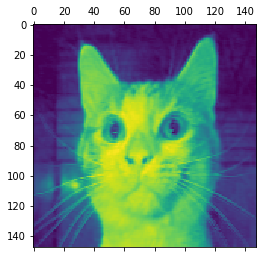

In [86]:
plt.matshow(first_layer_activation[0, :, :, 26], cmap='viridis')
plt.show()

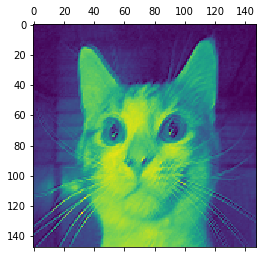

In [87]:
plt.matshow(first_layer_activation[0, :, :, 27], cmap='viridis')
plt.show()

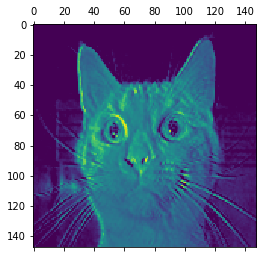

In [88]:
plt.matshow(first_layer_activation[0, :, :, 28], cmap='viridis')
plt.show()

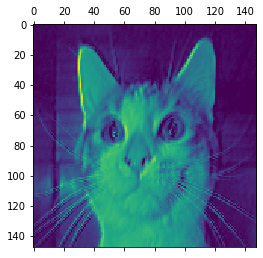

In [89]:
plt.matshow(first_layer_activation[0, :, :, 29], cmap='viridis')
plt.show()

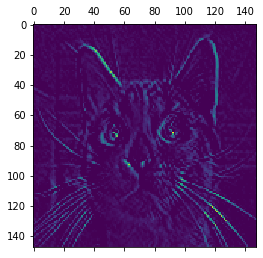

In [90]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

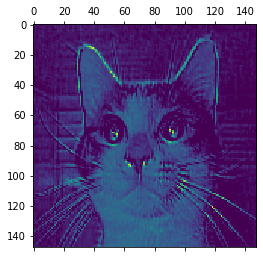

In [91]:
plt.matshow(first_layer_activation[0, :, :, 31], cmap='viridis')
plt.show()

IndexError: ignored

(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 34, 34, 128)
(1, 17, 17, 128)
(1, 15, 15, 128)
(1, 7, 7, 128)
(1, 6272)
(1, 6272)
(1, 512)
(1, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


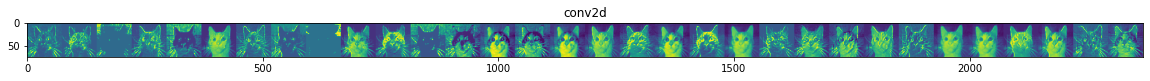

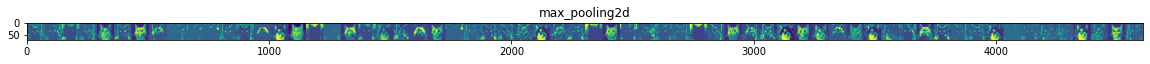

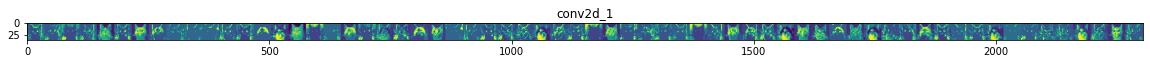

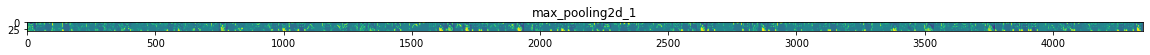

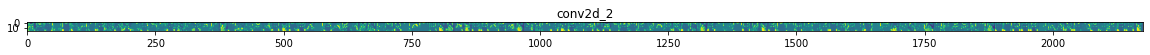

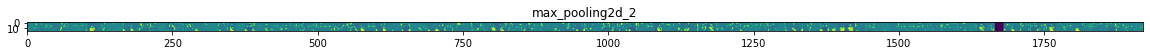

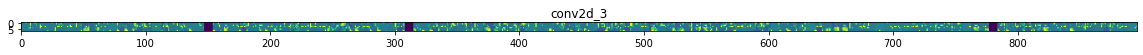

In [57]:
img_path='/content/drive/MyDrive/cats_and_dogs_small-20201212T071615Z-001/cats_and_dogs_small/train/cats/cat.739.jpg'
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [27]:
drawFeatureMap(activations)

NameError: ignored

In [49]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/content/drive/MyDrive/cats_and_dogs_small-20201212T071615Z-001/cats_and_dogs_small/train/cats')

# Directory with our training human pictures
train_human_dir = os.path.join('/content/drive/MyDrive/cats_and_dogs_small-20201212T071615Z-001/cats_and_dogs_small/train/dogs')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/content/drive/MyDrive/cats_and_dogs_small-20201212T071615Z-001/cats_and_dogs_small/test/cats')

# Directory with our training human pictures
validation_human_dir = os.path.join('/content/drive/MyDrive/cats_and_dogs_small-20201212T071615Z-001/cats_and_dogs_small/test/dogs')

In [50]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_hames = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


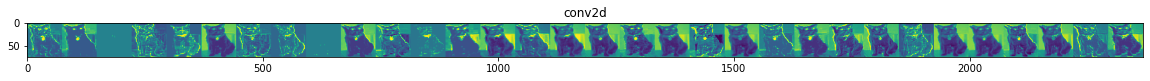

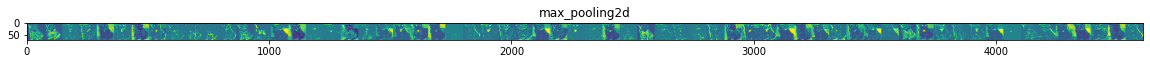

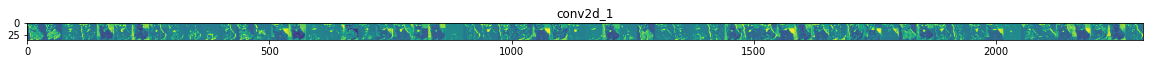

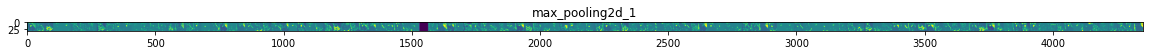

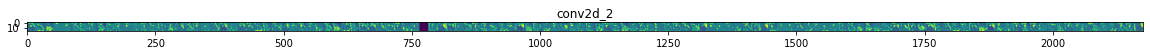

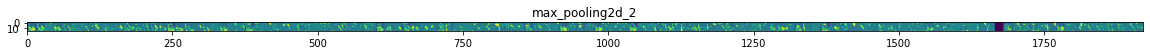

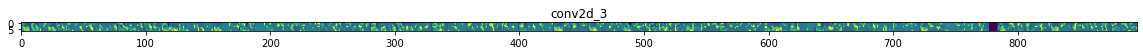

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [58]:

# summarize feature map size for each conv layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

553467904/553467096 [==============================] - 3s 0us/step
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [62]:
from tensorflow.keras.models import load_model

model =load_model('/content/drive/MyDrive/cats_and_dogs_small_pre_trained_vgg16.h5')
model = models.Model(inputs=model.inputs, outputs=model.layers[1].output)